# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

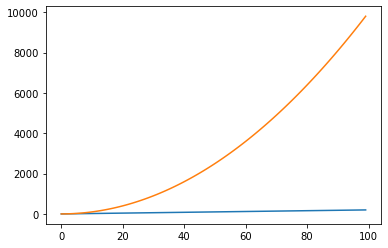

In [3]:
# Method 1
plt.plot(x,y,z)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

<function matplotlib.pyplot.show(close=None, block=None)>

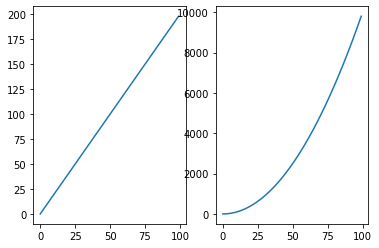

In [4]:
# Method 2
f , (x1,x2) = plt.subplots(nrows = 1, ncols = 2)
x1.plot(x,y)
x2.plot(x,z)
plt.show

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

<function matplotlib.pyplot.show(close=None, block=None)>

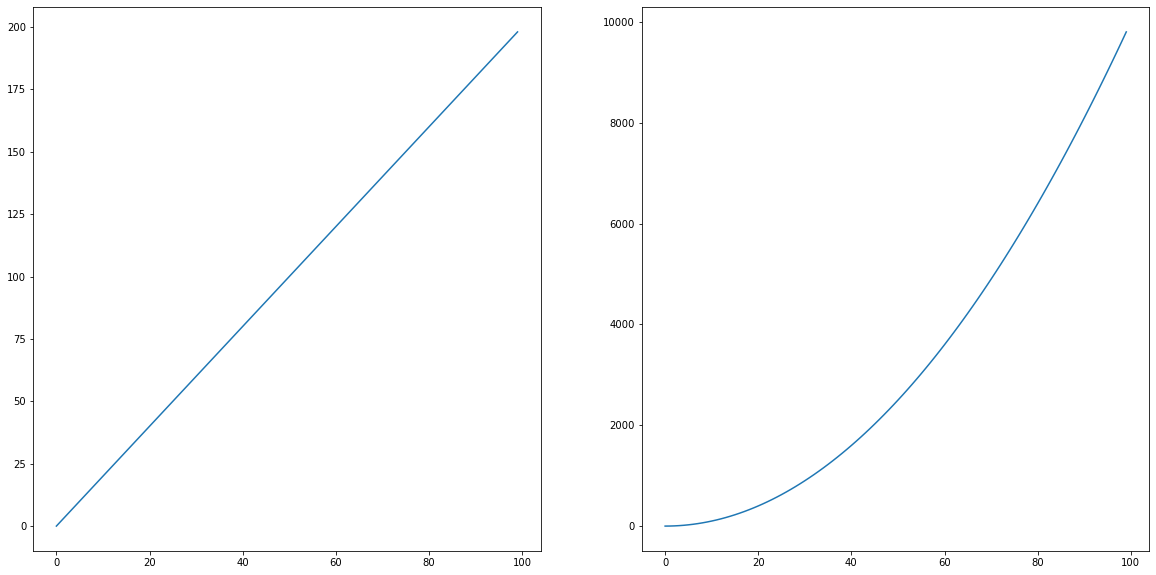

In [5]:
# your code here
f , (x1,x2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
x1.plot(x,y)
x2.plot(x,z)
plt.show

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

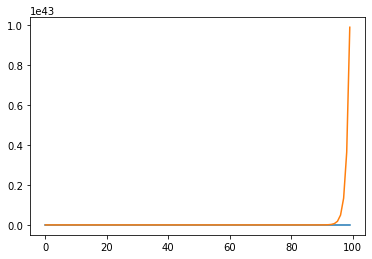

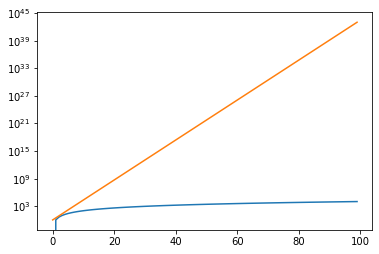

In [6]:
# your code here
x = np.arange(0,100)
y = x**2
z = np.exp(x)
plt.plot(x,y,z)
plt.show()
plt.plot(x,y,z)
plt.yscale('log')
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

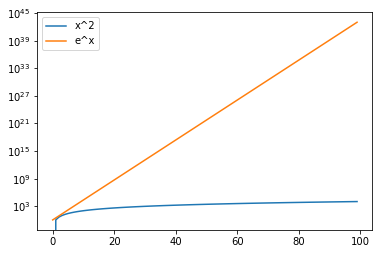

In [7]:
# your code here
x = np.arange(0,100)
y = x**2
z = np.exp(x)
plt.plot(x,y, label='x^2')
plt.plot(x,z, label='e^x')
plt.legend(loc="upper left")
plt.yscale('log')
plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
# your code here
fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

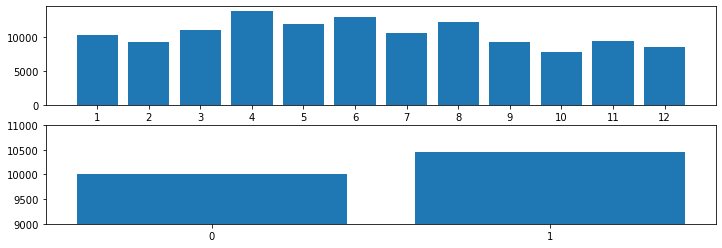

<Figure size 432x288 with 0 Axes>

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
med_steps_month = fitbit.groupby('Months_encoded').agg({'Steps':np.median}).reset_index()
#display(med_steps_month)
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
med_step_week = fitbit.groupby('Work_or_Weekend').agg({'Steps':np.median}).reset_index()
#display(med_step_week)

f , (x1,x2) = plt.subplots(nrows = 2, ncols = 1, figsize = (12,4))

x1.bar(med_steps_month['Months_encoded'],med_steps_month['Steps'])
x2.bar(med_step_week['Work_or_Weekend'],med_step_week['Steps'])
plt.show
plt.sca(x1)
plt.xticks(np.arange(1, 13, 1))
plt.sca(x2)
plt.xticks(np.arange(0, 2, 1))
plt.ylim(9000, 11000)
plt.show()
# outfile file has no content?
plt.savefig('figures.png')
plt.savefig('figures.pdf')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

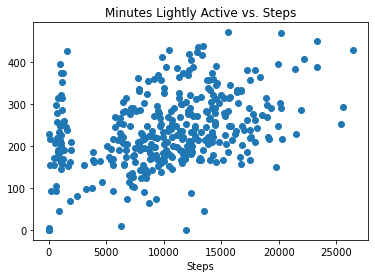

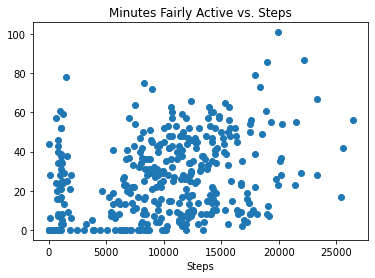

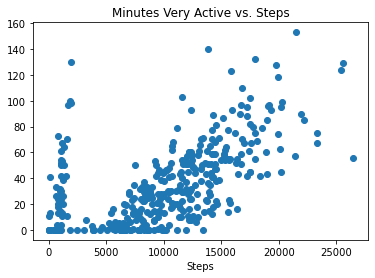

In [10]:
# your code here
minutes = ['Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active']
for type_of_minutes in minutes:
    plt.scatter(fitbit['Steps'],fitbit[''+type_of_minutes+''])
    plt.title(''+type_of_minutes+' vs. Steps')
    plt.xlabel('Steps')
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [11]:
# your code here
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [12]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [13]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes('int64','float64').columns

Index(['PassengerId', 'Pclass', 'SibSp', 'Parch'], dtype='object')

In [14]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes('object').columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [15]:
# your code here
# matplotlib
plt.style.use('classic')
plt.figsize=(12, 6)

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

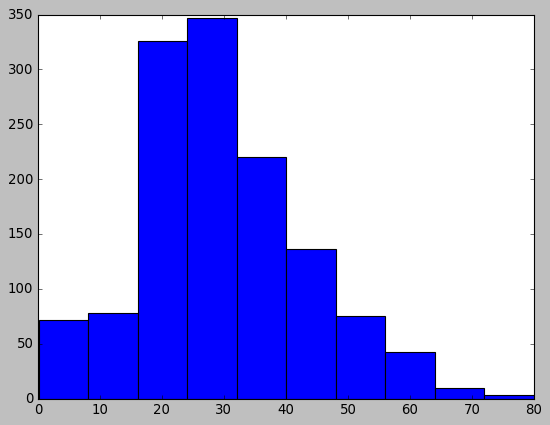

In [16]:
# your code here
plt.hist(titanic['Age'])

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <BarContainer object of 50 artists>)

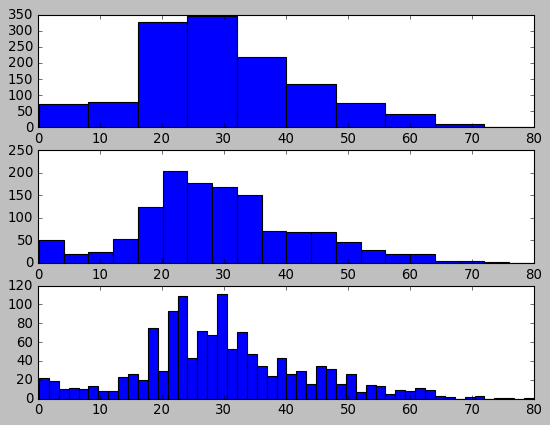

In [17]:
# your code here
f , (x1,x2,x3) = plt.subplots(nrows = 3, ncols = 1)
x1.hist(titanic['Age'], bins = 10)
x2.hist(titanic['Age'], bins = 20)
x3.hist(titanic['Age'], bins = 50)

#### How does the bin size affect your plot?

In [18]:
"""
your comments here
the more bins the smaller the individual bins and less frequent the events per bin
"""

'\nyour comments here\nthe more bins the smaller the individual bins and less frequent the events per bin\n'

#### Use seaborn to show the distribution of column `Age`.

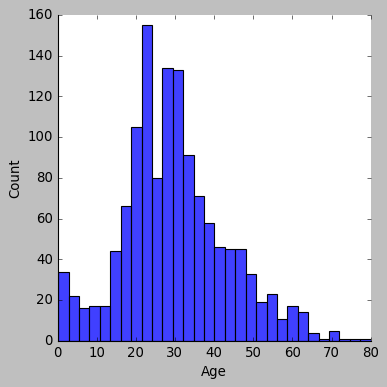

In [19]:
# your code here
sns.displot(titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

(array([843., 466.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

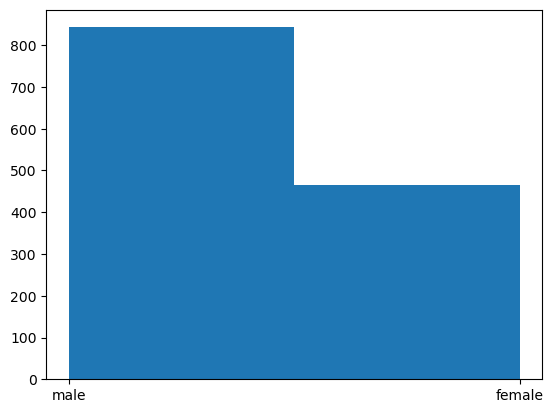

In [20]:
# Method 1 - matplotlib
# your code here
plt.style.use('default')
plt.hist(titanic['Gender'], bins = 2)

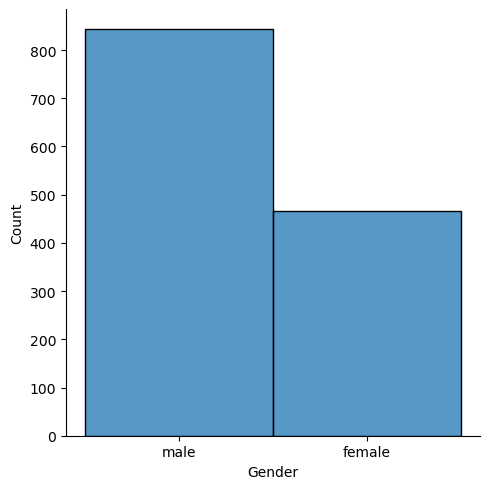

In [21]:
# Method 2 - seaborn
# your code here
sns.displot(titanic['Gender'])

#### Use the right plot to visualize the column `Pclass`.

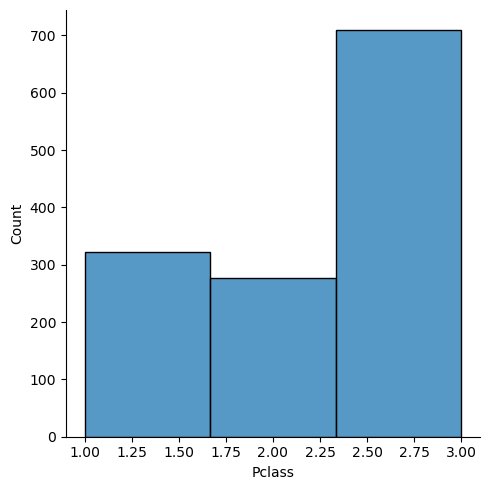

In [22]:
# your code here
sns.displot(titanic['Pclass'],bins = 3)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:ylabel='Age'>

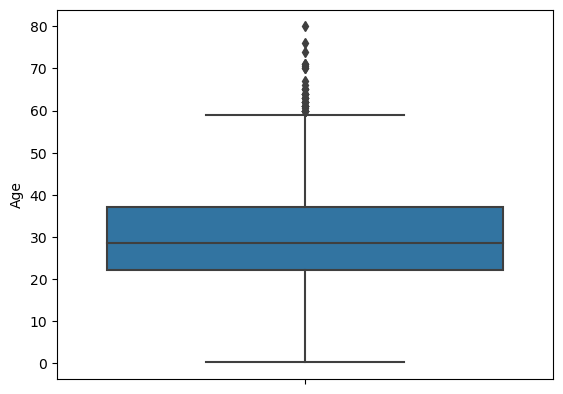

In [23]:
# your code here
sns.boxplot(y='Age', data = titanic)

In [24]:
"""
your comments here
you get in one shot the 25, 50 & 75 percentage quantile which gives you a good overview of the distribution of the age
"""

'\nyour comments here\nyou get in one shot the 25, 50 & 75 percentage quantile which gives you a good overview of the distribution of the age\n'

#### What does the last plot tell you about the feature `Age`?

In [25]:
"""
your comments here
- median below 30
- majority 50% are between 22 and 37 roughly 
- only a few outliers 60+
"""

'\nyour comments here\n- median below 30\n- majority 50% are between 22 and 37 roughly \n- only a few outliers 60+\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

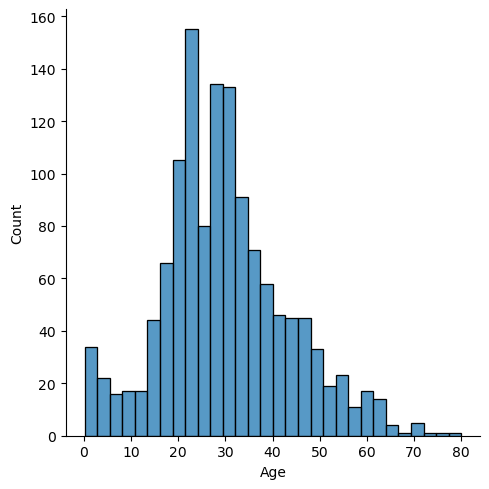

In [26]:
# your code here
sns.displot(titanic['Age'])

#### What additional information does the last plot provide about feature `Age`?

In [27]:
"""
your comments here
- a few more detailed information about the different age groups
"""

'\nyour comments here\n- a few more detailed information about the different age groups\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

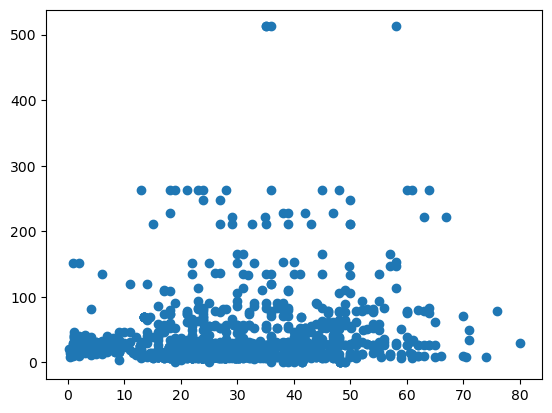

In [28]:
# Method 1 - matplotlib
# your code here
plt.scatter(titanic['Age'],titanic['Fare'])

<AxesSubplot:xlabel='Age', ylabel='Fare'>

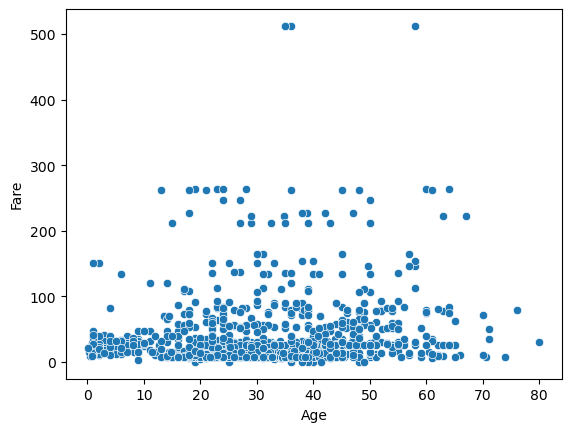

In [29]:
# Method 2 - seaborn
# your code here
sns.scatterplot(data=titanic,x='Age',y='Fare')

#### Plot the correlation matrix using seaborn.

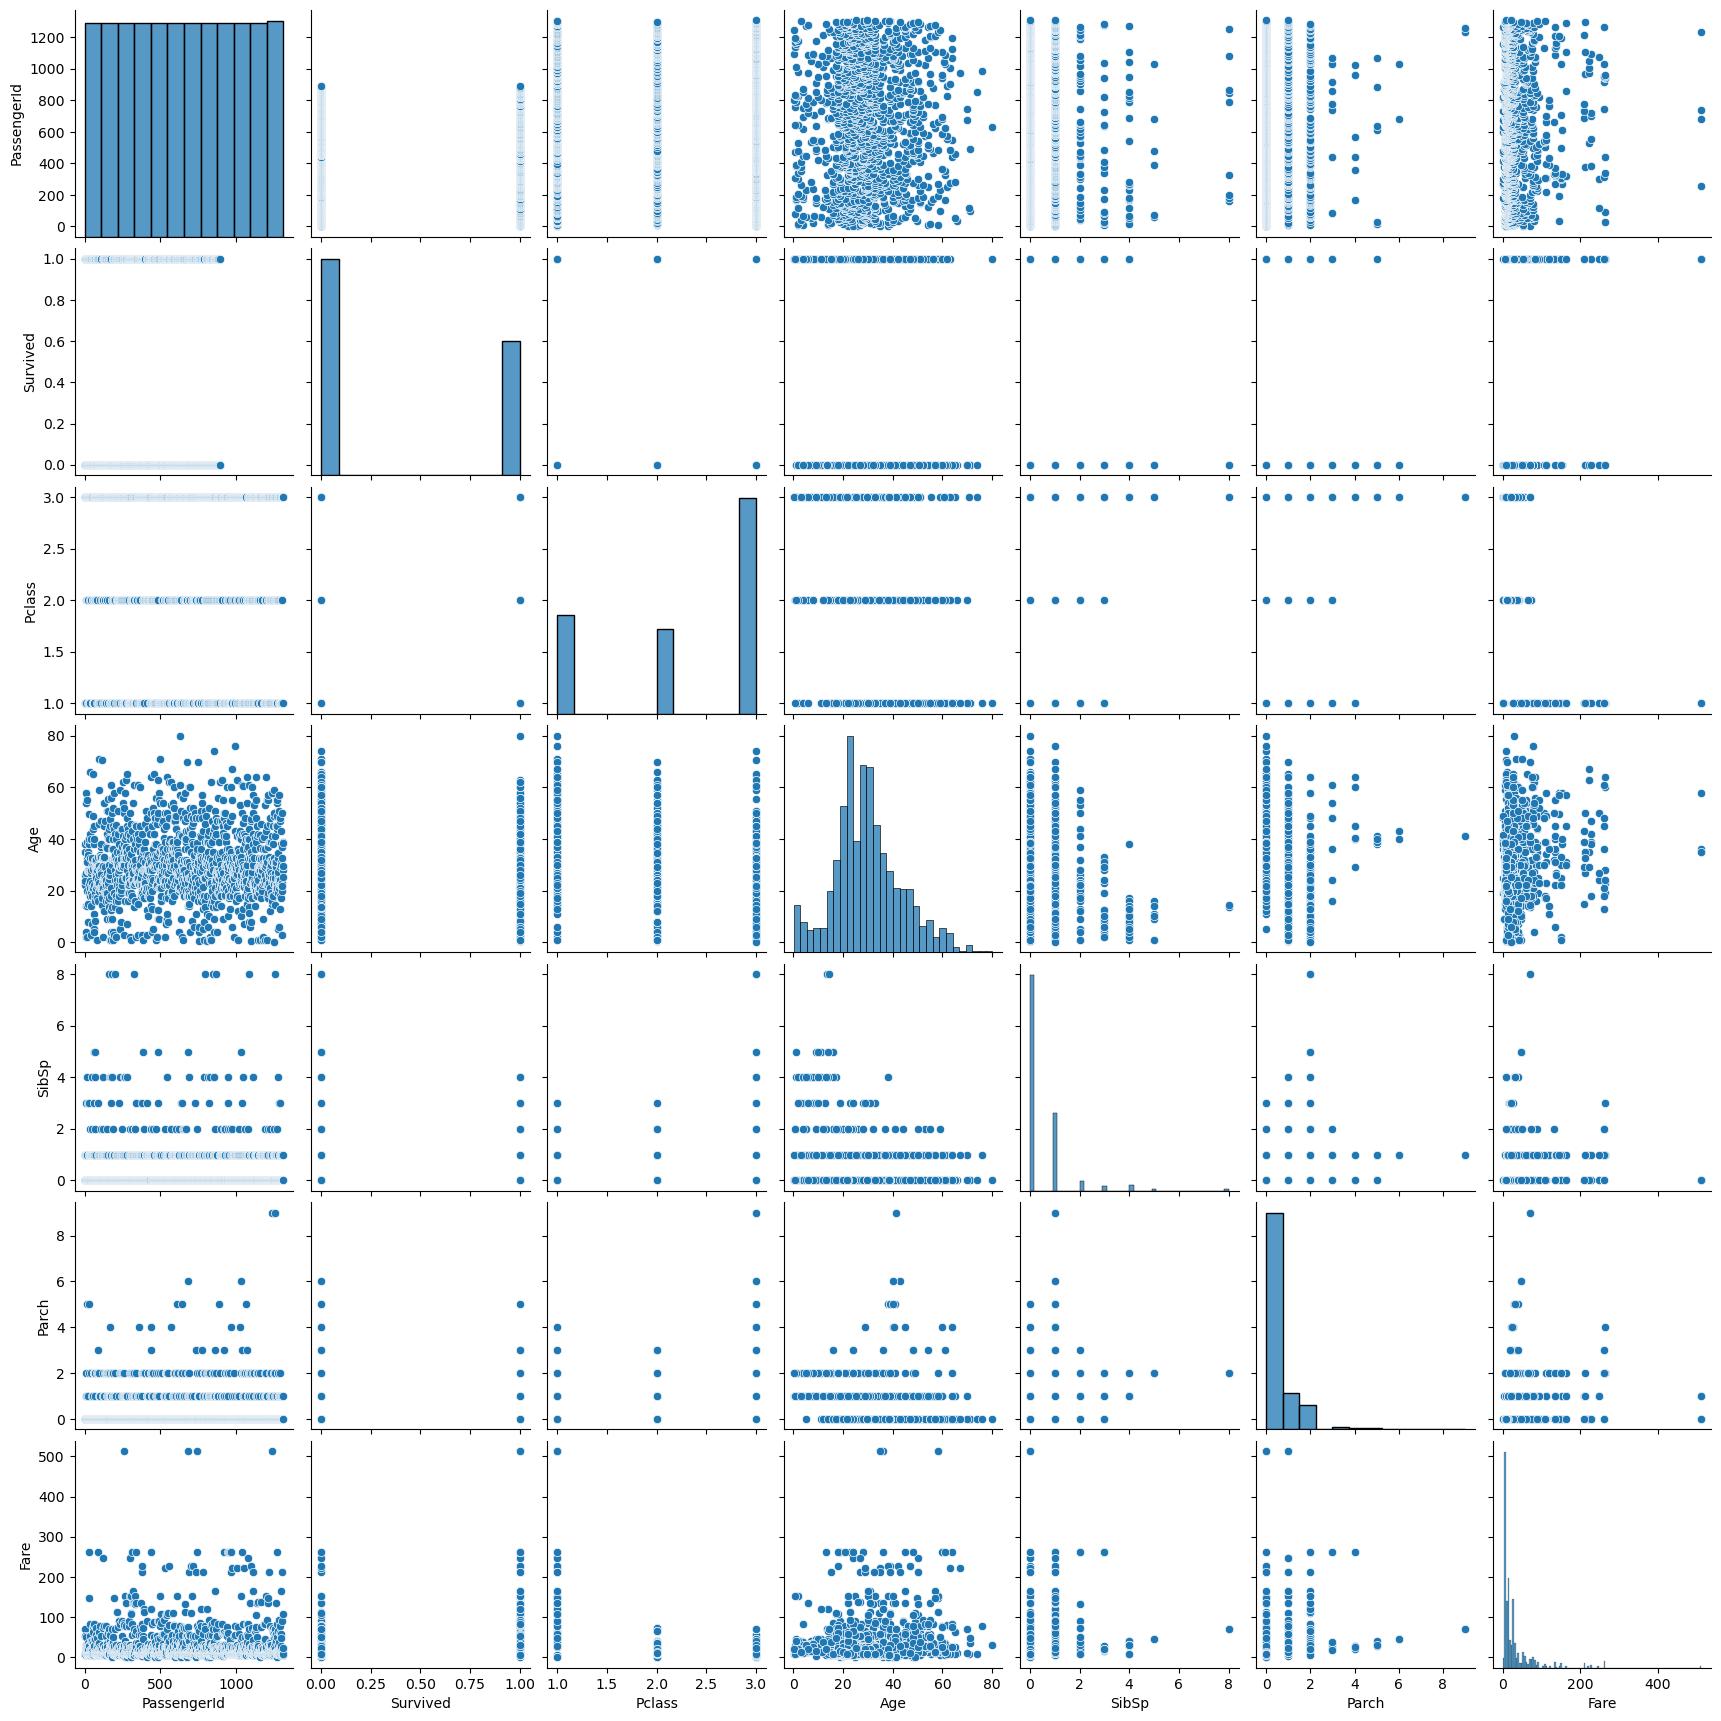

In [30]:
# your code here
sns.pairplot(titanic)

#### What are the most correlated features?

In [31]:
"""
your comments here
- no real obvious correlation?
"""

'\nyour comments here\n- no real obvious correlation?\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

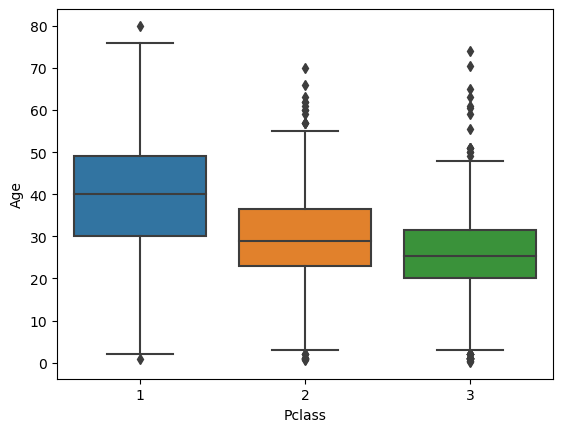

In [32]:
# your code here
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

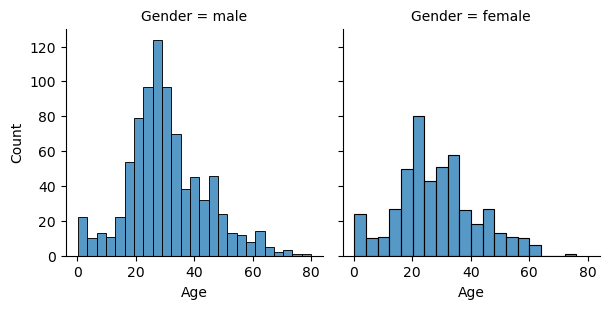

In [33]:
# your code here
g = sns.FacetGrid(titanic, col="Gender")
g.map_dataframe(sns.histplot, x="Age")
g.set_axis_labels('Age', 'Count')